<h1>Notebook feta per Rubén Álvarez i Pol Pérez </h1>

In [61]:
%pip install -r requirements.txt --ignore-installed

  Using cached nltk-3.8.1-py3-none-any.whl.metadata (2.8 kB)
  Using cached scikit_learn-1.4.1.post1-cp310-cp310-win_amd64.whl.metadata (11 kB)
  Using cached interpret-0.6.0-py3-none-any.whl.metadata (1.1 kB)
  Using cached click-8.1.7-py3-none-any.whl.metadata (3.0 kB)
  Using cached joblib-1.4.0-py3-none-any.whl.metadata (5.4 kB)
  Using cached regex-2023.12.25-cp310-cp310-win_amd64.whl.metadata (41 kB)
  Using cached tqdm-4.66.2-py3-none-any.whl.metadata (57 kB)
  Using cached numpy-1.26.4-cp310-cp310-win_amd64.whl.metadata (61 kB)
  Using cached scipy-1.13.0-cp310-cp310-win_amd64.whl.metadata (60 kB)
  Using cached threadpoolctl-3.4.0-py3-none-any.whl.metadata (13 kB)
  Using cached interpret_core-0.6.0-py3-none-any.whl.metadata (2.8 kB)
  Using cached pandas-2.2.1-cp310-cp310-win_amd64.whl.metadata (19 kB)
  Using cached ipykernel-6.29.4-py3-none-any.whl.metadata (6.3 kB)
  Using cached ipython-8.23.0-py3-none-any.whl.metadata (4.9 kB)
  Using cached psutil-5.9.8-cp37-abi3-win_am

ERROR: Could not install packages due to an OSError: [WinError 5] Acceso denegado: 'C:\\Users\\Pol\\AppData\\Local\\Packages\\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\\LocalCache\\local-packages\\Python310\\site-packages\\pywin32_system32\\pythoncom310.dll'
Check the permissions.



<h1> <a href= https://gebakx.github.io/plh/s4/index.html#14>Pràctica 2.a: Detecció d'opinions (Supervised Learning) </a> </h1>

___

## Importacions i lectura del text inicial

In [62]:
# Lectura de dades (Movie Reviews Corpus) NLTK

import nltk
import re
import sklearn
from sklearn.model_selection import train_test_split 
nltk.download('stopwords')
nltk.download('movie_reviews')
nltk.download('wordnet')
from nltk.corpus import movie_reviews as mr
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.ensemble import RandomForestClassifier


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Pol\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package movie_reviews to
[nltk_data]     C:\Users\Pol\AppData\Roaming\nltk_data...
[nltk_data]   Package movie_reviews is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Pol\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


La variable `all_texts` és una llista de llistes, on cada llista conté un text. La variable `all_labels` és una llista que conté les etiquetes reals (true labels) corresponents al text de la mateixa posició a `all_texts`.

In [63]:
A_all_texts = []
A_all_categories = []

for fileid in mr.fileids():
    A_all_texts.append(mr.raw(fileid))
    A_all_categories.append(mr.categories(fileid)[0])

In [64]:
A_all_categories.count('neg')

1000

## Preprocessat

Definim la funció `preprocessing(text)` que rep un text i retorna el text preprocessat. Utilitzem un *docstring* per especificar el que fa la fucnió.

In [65]:
def preprocessing(text : str) -> str:
  """Preprocessat de text per a anàlisi de sentiment. Aplica:
      - Eliminació de dígits
      - Conversió a minúscules
      - Substitució de dos espais per un
      - Eliminació de tabs
      - Lematització

  Args:
      text (str): text to preprocess

  Returns:
      String: text preprocessed
  """

  for num in range(10):
    text = text.replace(str(num), "")

  text = text.lower()

  text = re.sub(" +", " ", text)

  text = text.replace("\n ", "\n  ")

  text = text.replace('\t','')

  lemmatizer = WordNetLemmatizer()
  text = ' '.join([lemmatizer.lemmatize(word) for word in text.split()])
  
  return text

Apliquem el preprocessat mi el guardem en la variable `all_texts_preprocessed`.	

In [66]:
A_all_preprocesed_texts = []

for text in A_all_texts:
  text = preprocessing(text)
  A_all_preprocesed_texts.append(text)

## Definició i validació del model

### Separació train i test


In [67]:
# Separem les dades en train i test
X_train, X_test, y_train, y_test = train_test_split(A_all_preprocesed_texts, A_all_categories, test_size=0.2, random_state=14)

### Aplicació Count Vectorizer

Apliquem CountVectorizer eliminant stopwords per poder aplicar el model.

In [68]:
# Crear un objecte CountVectorizer eliminant les stopwords
vectorizer = CountVectorizer(stop_words=stopwords.words('english'), min_df=5)

# Ajustar el vectoritzador a les dades d'entrenament
train_matrix = vectorizer.fit_transform(X_train)

# Transformar les dades de test
test_matrix = vectorizer.transform(X_test)

### Grid search cross validation (Random Forest)

Definim els possibles hiperparàmetres i fem una cerca de graella per trobar els millors hiperparàmetres.

In [69]:
#Hyperparàmetres
n_estimators = [100, 200, 500]
max_depth = [3, 5, 10]
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2]

In [70]:
from sklearn.model_selection import GridSearchCV
param_grid = {'n_estimators': n_estimators, 'max_depth': max_depth, 'min_samples_split': min_samples_split, 'min_samples_leaf': min_samples_leaf}

rf = RandomForestClassifier()
rf_cv = GridSearchCV(rf, param_grid, cv=5)
rf_cv.fit(train_matrix, y_train)
print("Tuned Random Forest Parameters: {}".format(rf_cv.best_params_))

Tuned Random Forest Parameters: {'max_depth': 5, 'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 500}


### Random Forest amb els millors paràmetres

In [71]:
# Random forest
from sklearn.ensemble import RandomForestClassifier

# Crear un objecte RandomForestClassifier per saber si el text és positiu o negatiu
classifier = RandomForestClassifier(random_state=14, n_estimators=rf_cv.best_params_['n_estimators'], max_depth=rf_cv.best_params_['max_depth'], min_samples_split=rf_cv.best_params_['min_samples_split'], min_samples_leaf=rf_cv.best_params_['min_samples_leaf'])

# Entrenar el classificador
classifier.fit(train_matrix, y_train)

# Predir las categories de les dades de validació
test_predictions = classifier.predict(test_matrix)

## Resultats (aplicant el model a les dades test)

Mirem els resultats del nostre model i els comparem amb les etiquetes reals. Posem els resultats incorrectes en la llista `errors`.

In [72]:
errors = []

for i, prediction in enumerate(test_predictions):
    print(f"Prediction: {prediction}")
    print(f"Real_category: {y_test[i]}")
    print("-----------------------------")
    print(f"Text: {X_test[i][:100]}")
    if prediction != y_test[i]:
        errors.append((i, prediction, y_test[i]))

Prediction: neg
Real_category: pos
-----------------------------
Text: when you go to the movie a much a i do , you unfortunately end up seeing certain movie trailer one t
Prediction: pos
Real_category: pos
-----------------------------
Text: hollywood ha really done the whole dracula thing to death ( no pun intended - honest ) . it's a sham
Prediction: neg
Real_category: neg
-----------------------------
Text: i never understood what the clich ? " hell on earth " truly meant until very recently . i've just ne
Prediction: neg
Real_category: pos
-----------------------------
Text: whenever studio executive try to combine the successful formula of two blockbuster film , the end re
Prediction: neg
Real_category: neg
-----------------------------
Text: " return to horror high , " want to be a couple different type of movie at once . the film tell the 
Prediction: pos
Real_category: neg
-----------------------------
Text: don't get me wrong -- i tend to appreciate besson's naive , unashamed

In [73]:
print(errors)
print(len(errors))

[(0, 'neg', 'pos'), (3, 'neg', 'pos'), (5, 'pos', 'neg'), (14, 'neg', 'pos'), (18, 'pos', 'neg'), (22, 'pos', 'neg'), (27, 'pos', 'neg'), (33, 'pos', 'neg'), (37, 'pos', 'neg'), (44, 'neg', 'pos'), (52, 'neg', 'pos'), (54, 'neg', 'pos'), (67, 'neg', 'pos'), (69, 'neg', 'pos'), (79, 'neg', 'pos'), (82, 'neg', 'pos'), (96, 'pos', 'neg'), (102, 'neg', 'pos'), (115, 'neg', 'pos'), (127, 'pos', 'neg'), (129, 'neg', 'pos'), (131, 'pos', 'neg'), (143, 'pos', 'neg'), (153, 'pos', 'neg'), (154, 'pos', 'neg'), (170, 'pos', 'neg'), (188, 'pos', 'neg'), (201, 'pos', 'neg'), (202, 'neg', 'pos'), (222, 'neg', 'pos'), (229, 'neg', 'pos'), (231, 'neg', 'pos'), (235, 'neg', 'pos'), (239, 'pos', 'neg'), (240, 'neg', 'pos'), (245, 'pos', 'neg'), (252, 'pos', 'neg'), (276, 'neg', 'pos'), (278, 'neg', 'pos'), (287, 'pos', 'neg'), (295, 'neg', 'pos'), (303, 'neg', 'pos'), (307, 'neg', 'pos'), (311, 'pos', 'neg'), (316, 'neg', 'pos'), (338, 'neg', 'pos'), (343, 'pos', 'neg'), (345, 'neg', 'pos'), (350, 'pos'

In [74]:
# Calcular la precisión
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, test_predictions)

accuracy

0.8525

<h1> <a href= https://gebakx.github.io/plh/s4/index.html#17> Pràctica 2.b: Detecció d'opinions (Unsupervised Learning) </a> </h1>

___

## Importacions i lectura del text inicial

In [75]:
import nltk
from nltk.tokenize import word_tokenize
from nltk import sent_tokenize
from nltk.wsd import lesk
import re
from sklearn.model_selection import train_test_split 

nltk.download('movie_reviews')
nltk.download('wordnet')
nltk.download('sentiwordnet')
from nltk.corpus import movie_reviews as mr
from nltk.corpus import sentiwordnet as swn
from nltk.corpus import wordnet as wn
from nltk import pos_tag
from nltk.wsd import lesk
nltk.download('averaged_perceptron_tagger')

from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

[nltk_data] Downloading package movie_reviews to
[nltk_data]     C:\Users\Pol\AppData\Roaming\nltk_data...
[nltk_data]   Package movie_reviews is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Pol\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package sentiwordnet to
[nltk_data]     C:\Users\Pol\AppData\Roaming\nltk_data...
[nltk_data]   Package sentiwordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\Pol\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


In [76]:
all_texts = []
all_categories = []

for fileid in mr.fileids():
    all_texts.append(mr.raw(fileid))
    all_categories.append(mr.categories(fileid)[0])

## Preprocessat

Definim el prerpocessat a aplicar. Arreglem el format del text, eliminem números i convertim el text en minúscules.

In [77]:
def preprocessing(text):
  """Preprocessat de text per a anàlisi de sentiment. Aplica:
      - Eliminació de dígits
      - Conversió a minúscules
      - Substitució de dos espais per un
      - Eliminació de tabs

  Args:
      text (str): text to preprocess

  Returns:
      String: text preprocessed
  """
  
  for num in range(10):
    text = text.replace(str(num), "")

  text = text.lower()

  text = re.sub(" +", " ", text)

  text = text.replace("\n ", "\n  ")

  text = text.replace('\t','')
  
  return text

In [78]:
# Separem les dades en train i test, només utilitzarem les dades de test per aquesta part
X_train, X_test, y_train, y_test = train_test_split(all_texts, all_categories, test_size=0.2, random_state=14)

Apliquem el preprocessat als textos i els guardem en la variable `all_preprocesed_texts`.

In [79]:
all_preprocesed_texts = []

for text in X_test:
  text = preprocessing(text)
  all_preprocesed_texts.append(text)

## Tokenització, decisió de ctegories gramaticals utilitzades i desambiguació amb Lesk

Definim tres funcions `get_all_sentiment_score(text)`, `get_adjective_sentiment_score(text)` i `get_name_adjective_adverb_sentiment_score(text)` que reben un text i retornen el sentiment score del text. Fem aquests tres models per poder contemplar les diferents combinacions de paraules que podem tenir en compte per calcular el sentiment score.

Aquestes funcions tokenitzen els textos en frases i després en paraules, decideixen quines paraules utilitzar i les desambigüen amb Lesk per poder extraure el sentiment score del text. Aquestes funcions retornen un número, si aquest és més gran o igual a zero, el text es considera positiu, sinó, el text es considera negatiu. 

In [80]:
def get_all_sentiment_score(text):
  """Calcula el sentiment score d'un text tenint en compte totes les paraules d'aquest. 
  1. Tokenitzar per frases
  2. Tokenitzar per paraules
  3. Desambiguació
  4. Calcular el setiment score del text 

  Args:
      text (list[str]): text per a calcular el sentiment score d'un text

  Returns:
      Float: sentiment score
  """
  
  sentiment_score = 0
  sent_tokenize_list = sent_tokenize(text)
    
  for sentence in sent_tokenize_list:
      word = word_tokenize(sentence)
      tagged_words = pos_tag(word)
        
      for word, pos in tagged_words:
          synsets = wn.synsets(word) # Agafar el synset 
          if synsets:
              synset = lesk(text, word) # Desambiguació
              if synset:
                  senti_synset = swn.senti_synset(synset.name())
                  sentiment_score += senti_synset.pos_score() - senti_synset.neg_score()
                        
  return sentiment_score

In [81]:
def get_adjective_sentiment_score(text):
    """Calcula el sentiment score dels adjectius en un text
    1. Tokenitzar per frases
    2. Tokenitzar per paraules
    3. Identificació d'adjectius
    4. Desambiguació
    5. Calcular el setiment score del text 

    Args:
        text (list[str]): text per a calcular el sentiment score

    Returns:
        Float: sentiment score
    """
    
    sentiment_score = 0
    sent_tokenize_list = sent_tokenize(text)
    
    for sentence in sent_tokenize_list:
        word = word_tokenize(sentence)
        tagged_words = pos_tag(word)
        
        for word, pos in tagged_words:
            if pos.startswith('JJ'):  # 'JJ' es el codi POS per a adjectius
                synsets = wn.synsets(word, pos=wn.ADJ)  # Només considera els synsets que son adjectius
                if synsets:
                    synset = lesk(text, word, pos=wn.ADJ)  # Només considera els synsets que son adjectius
                    if synset:
                        senti_synset = swn.senti_synset(synset.name())
                        sentiment_score += senti_synset.pos_score() - senti_synset.neg_score()
                        
    return sentiment_score

In [82]:
def get_name_adjective_adverb_sentiment_score(text):
    """Calcula el sentiment score dels noms, adjectius y adverbis en un text
    1. Tokenitzar per frases
    2. Tokenitzar per paraules
    3. Identificació d'adjectius, noms i adverbis
    4. Desambiguació
    5. Calcular el setiment score del text 

    Args:
        text (list[str]): text per a calcular el sentiment score

    Returns:
        Float: sentiment score
    """
    
    sentiment_score = 0
    sent_tokenize_list = sent_tokenize(text)
    
    for sentence in sent_tokenize_list:
        word = word_tokenize(sentence)
        tagged_words = pos_tag(word)
        
        for word, pos in tagged_words:
            if pos.startswith(('JJ', 'NN', 'RB')):  # 'JJ' es el codi POS per a adjectius, 'NN' per a noms i 'RB' per adverbis
                synsets = wn.synsets(word, pos=[wn.NOUN, wn.ADJ, wn.ADV])  # Considera els synsets que son noms, adjectius i adverbis
                if synsets:
                    synset = lesk(text, word, pos=[wn.NOUN, wn.ADJ, wn.ADV])  # Considera els synsets que son noms, adjectius i adverbis
                    if synset:
                        senti_synset = swn.senti_synset(synset.name())
                        sentiment_score += senti_synset.pos_score() - senti_synset.neg_score()
                        
    return sentiment_score

## Reslutats aplicació 2b

Definim la nostra predicció final com la suma de les prediccions dels tres models. Si la suma és més gran o igual a zero, el text es considera positiu, sinó, el text es considera negatiu. Així doncs el nostre model definitiu és un ensamble dels altres tres.

In [84]:
y_pred = []

for text in all_preprocesed_texts:
    if get_adjective_sentiment_score(text) + get_name_adjective_adverb_sentiment_score(text) + get_all_sentiment_score(text) >= 0:
        y_pred.append('pos')
    else:
        y_pred.append('neg')


In [85]:
# Calcular la precisión
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, y_pred)

accuracy

0.645

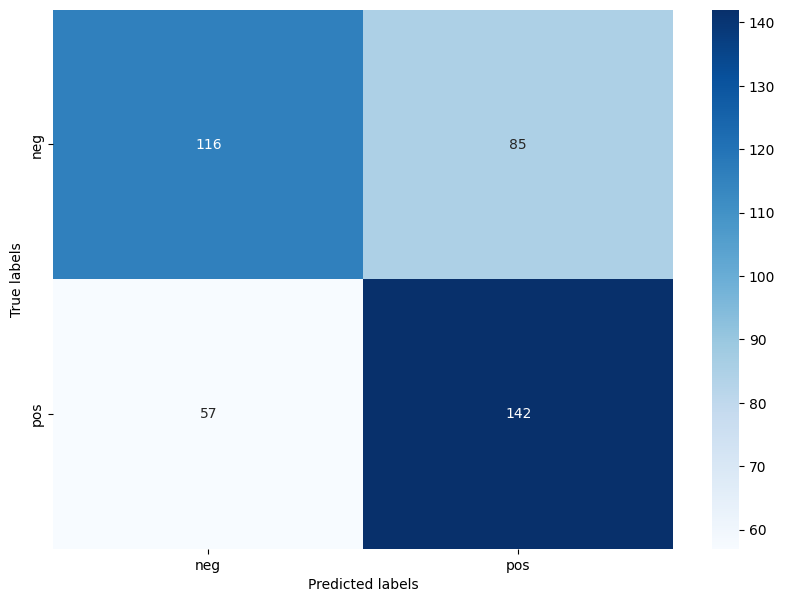

In [86]:
conf_matrix = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['neg', 'pos'], yticklabels=['neg', 'pos'])
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.show()